# Test TA - Data Weather prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../raw_data/data_weather.csv')
data.head()

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-0.642788
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-0.342020
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,0.342020
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,0.642788
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,0.642788


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505857 entries, 0 to 505856
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       505857 non-null  object 
 1   numer_sta  505857 non-null  float64
 2   Latitude   505857 non-null  float64
 3   Longitude  505857 non-null  float64
 4   Altitude   505857 non-null  float64
 5   pmer       505857 non-null  float64
 6   dd         505857 non-null  float64
 7   ff         505857 non-null  float64
 8   t          505857 non-null  float64
 9   u          505857 non-null  float64
 10  ssfrai     505857 non-null  float64
 11  rr3        505857 non-null  int64  
 12  pres       505791 non-null  float64
 13  dd_sin     505857 non-null  float64
 14  dd_cos     505857 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 57.9+ MB


In [4]:
data[pd.isnull(data).any(axis=1)]

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
59201,2018-09-21 03:00:00,7434.0,45.861167,1.175000,402.0,101620.0,250.0,2.2,15.70,90.0,0.0,0,NaN,-9.396926e-01,-0.342020
59202,2018-09-21 06:00:00,7434.0,45.861167,1.175000,402.0,101620.0,240.0,3.9,16.30,93.0,0.0,0,NaN,-8.660254e-01,-0.500000
68527,2010-05-03 15:00:00,7643.0,43.577000,3.963167,2.0,100825.0,10.0,0.0,16.30,51.5,0.0,0,NaN,1.736482e-01,0.984808
69997,2010-11-05 06:00:00,7643.0,43.577000,3.963167,2.0,102965.0,10.0,0.0,14.75,84.0,0.0,0,NaN,1.736482e-01,0.984808
70675,2011-01-30 03:00:00,7643.0,43.577000,3.963167,2.0,101110.0,10.0,0.0,3.35,92.0,0.0,0,NaN,1.736482e-01,0.984808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416766,2014-03-05 15:00:00,7280.0,47.267833,5.088333,219.0,102110.0,10.0,5.7,11.80,43.0,0.0,0,NaN,1.736482e-01,0.984808
437506,2021-04-28 12:00:00,7280.0,47.267833,5.088333,219.0,100420.0,200.0,1.8,10.50,71.5,0.0,0,NaN,-3.420201e-01,-0.939693
447618,2013-03-17 03:00:00,7299.0,47.614333,7.510000,263.0,100655.0,260.0,0.0,3.85,61.5,0.0,0,NaN,-9.848078e-01,-0.173648
468528,2020-05-18 21:00:00,7299.0,47.614333,7.510000,263.0,102110.0,260.0,0.0,17.95,54.5,0.0,0,NaN,-9.848078e-01,-0.173648


In [5]:
set(data['rr3'].tolist())

{0, 1}

La colonne rr3 est classifiée : 
  * 0 : pas de pluie
  * 1 : pluie 


On va faire deux types de prédictions je pense : 
  * Machine learning classique pour voir quelles features influent sur l'apparition de pluie
  * RNN with challenge predict air pollution 

## Data Cleaning


### Null / duplicates / Extreme

#### Duplicates

In [6]:
len(data)

505857

In [7]:
data[data.duplicated()]

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
15061,2015-03-04 12:00:00,7510.0,44.830667,-0.691333,47.0,103540.0,350.0,5.2,10.3,50.0,0.0,0,102940.0,-0.173648,9.848078e-01
18988,2016-07-07 12:00:00,7510.0,44.830667,-0.691333,47.0,101930.0,30.0,1.7,28.5,37.0,0.0,0,101380.0,0.500000,8.660254e-01
25729,2018-10-29 18:00:00,7510.0,44.830667,-0.691333,47.0,99920.0,280.0,2.8,5.4,87.0,0.0,0,99340.0,-0.984808,1.736482e-01
31751,2020-11-20 18:00:00,7510.0,44.830667,-0.691333,47.0,103620.0,30.0,2.1,8.3,71.0,0.0,0,103020.0,0.500000,8.660254e-01
48852,2015-03-04 12:00:00,7434.0,45.861167,1.175000,402.0,103320.0,340.0,5.2,5.9,61.0,0.0,0,98380.0,-0.342020,9.396926e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475056,2011-01-12 15:00:00,7650.0,43.437667,5.216000,9.0,102110.0,340.0,9.3,12.6,47.0,0.0,0,101720.0,-0.342020,9.396926e-01
487149,2015-03-04 12:00:00,7650.0,43.437667,5.216000,9.0,102260.0,310.0,12.3,9.9,59.0,0.0,0,101870.0,-0.766044,6.427876e-01
491073,2016-07-07 12:00:00,7650.0,43.437667,5.216000,9.0,101640.0,270.0,2.8,30.9,30.0,0.0,0,101280.0,-1.000000,-1.836970e-16
497811,2018-10-29 18:00:00,7650.0,43.437667,5.216000,9.0,98530.0,280.0,13.1,6.9,90.0,0.0,1,98150.0,-0.984808,1.736482e-01


In [8]:
data.duplicated().sum()

66

In [9]:
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

505791

#### Null values

In [10]:
data.isnull().sum()

date          0
numer_sta     0
Latitude      0
Longitude     0
Altitude      0
pmer          0
dd            0
ff            0
t             0
u             0
ssfrai        0
rr3           0
pres         66
dd_sin        0
dd_cos        0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505791 entries, 0 to 505856
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       505791 non-null  object 
 1   numer_sta  505791 non-null  float64
 2   Latitude   505791 non-null  float64
 3   Longitude  505791 non-null  float64
 4   Altitude   505791 non-null  float64
 5   pmer       505791 non-null  float64
 6   dd         505791 non-null  float64
 7   ff         505791 non-null  float64
 8   t          505791 non-null  float64
 9   u          505791 non-null  float64
 10  ssfrai     505791 non-null  float64
 11  rr3        505791 non-null  int64  
 12  pres       505725 non-null  float64
 13  dd_sin     505791 non-null  float64
 14  dd_cos     505791 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 61.7+ MB


In [12]:
data[pd.isnull(data).any(axis=1)]

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
59201,2018-09-21 03:00:00,7434.0,45.861167,1.175000,402.0,101620.0,250.0,2.2,15.70,90.0,0.0,0,NaN,-9.396926e-01,-0.342020
59202,2018-09-21 06:00:00,7434.0,45.861167,1.175000,402.0,101620.0,240.0,3.9,16.30,93.0,0.0,0,NaN,-8.660254e-01,-0.500000
68527,2010-05-03 15:00:00,7643.0,43.577000,3.963167,2.0,100825.0,10.0,0.0,16.30,51.5,0.0,0,NaN,1.736482e-01,0.984808
69997,2010-11-05 06:00:00,7643.0,43.577000,3.963167,2.0,102965.0,10.0,0.0,14.75,84.0,0.0,0,NaN,1.736482e-01,0.984808
70675,2011-01-30 03:00:00,7643.0,43.577000,3.963167,2.0,101110.0,10.0,0.0,3.35,92.0,0.0,0,NaN,1.736482e-01,0.984808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416766,2014-03-05 15:00:00,7280.0,47.267833,5.088333,219.0,102110.0,10.0,5.7,11.80,43.0,0.0,0,NaN,1.736482e-01,0.984808
437506,2021-04-28 12:00:00,7280.0,47.267833,5.088333,219.0,100420.0,200.0,1.8,10.50,71.5,0.0,0,NaN,-3.420201e-01,-0.939693
447618,2013-03-17 03:00:00,7299.0,47.614333,7.510000,263.0,100655.0,260.0,0.0,3.85,61.5,0.0,0,NaN,-9.848078e-01,-0.173648
468528,2020-05-18 21:00:00,7299.0,47.614333,7.510000,263.0,102110.0,260.0,0.0,17.95,54.5,0.0,0,NaN,-9.848078e-01,-0.173648


In [13]:
# handling null values 
data.isnull().sum().sort_values(ascending=False)/len(data)

pres         0.00013
date         0.00000
numer_sta    0.00000
Latitude     0.00000
Longitude    0.00000
Altitude     0.00000
pmer         0.00000
dd           0.00000
ff           0.00000
t            0.00000
u            0.00000
ssfrai       0.00000
rr3          0.00000
dd_sin       0.00000
dd_cos       0.00000
dtype: float64

In [14]:
# Replace null value per mean 
data.pres.mean()

99359.87394334866

In [15]:
data.pres.replace(np.nan,data.pres.mean(),inplace=True)

In [16]:
data.isnull().sum().sort_values(ascending=False)/len(data)

date         0.0
numer_sta    0.0
Latitude     0.0
Longitude    0.0
Altitude     0.0
pmer         0.0
dd           0.0
ff           0.0
t            0.0
u            0.0
ssfrai       0.0
rr3          0.0
pres         0.0
dd_sin       0.0
dd_cos       0.0
dtype: float64

#### extreme

In [17]:
data.select_dtypes(exclude=[object]).describe()

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
count,505791.000000,505791.000000,505791.000000,505791.000000,5.057910e+05,505791.000000,505791.000000,505791.000000,505791.000000,505791.000000,505791.000000,505791.000000,5.057910e+05,505791.000000
mean,7464.115581,45.478182,3.451443,193.197730,inf,185.486812,3.417337,13.266409,71.292318,0.000035,0.018029,99359.873943,-7.265446e-02,0.096639
std,161.479116,1.502583,2.724437,217.479853,NaN,112.879696,2.350451,7.781565,18.898248,0.003194,0.133057,2597.333011,6.482744e-01,0.751748
min,7222.000000,43.437667,-1.608833,2.000000,1.059852e-205,0.000000,0.000000,-19.700000,1.000000,0.000000,0.000000,88160.000000,-1.000000e+00,-1.000000
25%,7280.000000,43.648833,1.175000,26.000000,1.012600e+05,80.000000,1.600000,7.700000,58.000000,0.000000,0.000000,98430.000000,-6.427876e-01,-0.642788
50%,7481.000000,45.726500,3.963167,151.000000,1.017500e+05,190.000000,3.000000,13.000000,74.000000,0.000000,0.000000,99960.000000,-2.449294e-16,0.173648
75%,7630.000000,47.150000,5.216000,263.000000,1.022900e+05,280.000000,4.600000,18.700000,87.000000,0.000000,0.000000,101120.000000,5.000000e-01,0.866025
max,7690.000000,47.614333,7.510000,871.000000,inf,360.000000,23.500000,42.000000,100.000000,0.990000,1.000000,104170.000000,1.000000e+00,1.000000


In [18]:
data[data.pmer==max(data.pmer)]

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
202846,2010-02-23 12:00:00,7591.0,44.565667,6.502333,871.0,inf,210.0,1.0,5.7,76.0,0.0,0,90190.0,-0.500000,-0.866025
202848,2010-02-23 18:00:00,7591.0,44.565667,6.502333,871.0,inf,250.0,2.1,5.7,87.0,0.0,0,90240.0,-0.939693,-0.342020
202908,2010-03-03 06:00:00,7591.0,44.565667,6.502333,871.0,inf,20.0,6.2,5.7,38.0,0.0,0,91280.0,0.342020,0.939693
202912,2010-03-03 18:00:00,7591.0,44.565667,6.502333,871.0,inf,20.0,8.7,5.7,61.0,0.0,0,90570.0,0.342020,0.939693
203168,2010-04-04 18:00:00,7591.0,44.565667,6.502333,871.0,inf,10.0,1.0,5.7,79.0,0.0,0,91410.0,0.173648,0.984808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234780,2021-02-16 12:00:00,7591.0,44.565667,6.502333,871.0,inf,190.0,2.0,5.7,55.0,0.0,0,92470.0,-0.173648,-0.984808
235215,2021-04-12 00:00:00,7591.0,44.565667,6.502333,871.0,inf,20.0,3.7,5.7,94.0,0.0,1,91420.0,0.342020,0.939693
235291,2021-04-21 21:00:00,7591.0,44.565667,6.502333,871.0,inf,20.0,1.1,5.7,89.0,0.0,0,91630.0,0.342020,0.939693
235371,2021-05-01 21:00:00,7591.0,44.565667,6.502333,871.0,inf,200.0,1.1,5.7,91.0,0.0,0,90830.0,-0.342020,-0.939693


In [19]:
data.pmer[data.pmer==max(data.pmer)].count()/len(data)

0.00025702315778651654

It is not normal to have an infinite value for the pmer - we notice that this value occurs for the same location , we are going to drop those rows

In [20]:
# get list of the index with the false observation
false_observation = data.index[data.pmer==max(data.pmer)].tolist()

In [21]:
# drop 

data=data.drop(false_observation).reset_index(drop=True) # Drop row

In [22]:
len(data)

505661

In [23]:
data.describe()

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
count,505661.000000,505661.000000,505661.000000,505661.000000,5.056610e+05,505661.000000,505661.000000,505661.000000,505661.000000,505661.000000,505661.000000,505661.000000,5.056610e+05,505661.000000
mean,7464.082961,45.478417,3.450658,193.023474,3.625316e+94,185.507405,3.417437,13.268354,71.293086,0.000035,0.018028,99361.885298,-7.272457e-02,0.096562
std,161.487053,1.502705,2.724348,217.236058,2.333790e+96,112.872805,2.350307,7.781619,18.898104,0.003195,0.133052,2594.608112,6.482974e-01,0.751731
min,7222.000000,43.437667,-1.608833,2.000000,1.059852e-205,0.000000,0.000000,-19.700000,1.000000,0.000000,0.000000,88160.000000,-1.000000e+00,-1.000000
25%,7280.000000,43.648833,1.175000,26.000000,1.012500e+05,80.000000,1.600000,7.700000,58.000000,0.000000,0.000000,98430.000000,-6.427876e-01,-0.642788
50%,7481.000000,45.726500,3.963167,151.000000,1.017500e+05,190.000000,3.000000,13.000000,74.000000,0.000000,0.000000,99970.000000,-2.449294e-16,0.173648
75%,7630.000000,47.150000,5.216000,263.000000,1.022900e+05,280.000000,4.600000,18.700000,87.000000,0.000000,0.000000,101120.000000,5.000000e-01,0.866025
max,7690.000000,47.614333,7.510000,871.000000,1.529591e+98,360.000000,23.500000,42.000000,100.000000,0.990000,1.000000,104170.000000,1.000000e+00,1.000000


### change date format and separate date from hour a column

In [24]:
data.date = pd.to_datetime(data['date'])

In [25]:
data['hour'] = data.date.dt.hour

In [26]:
data

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos,hour
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-6.427876e-01,0
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-3.420201e-01,3
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,3.420201e-01,6
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,6.427876e-01,9
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,6.427876e-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505656,2021-07-31 09:00:00,7650.0,43.437667,5.216000,9.0,100920.0,310.0,3.2,27.2,58.0,0.0,0,100560.0,-0.766044,6.427876e-01,9
505657,2021-07-31 12:00:00,7650.0,43.437667,5.216000,9.0,100770.0,270.0,6.1,30.6,49.0,0.0,0,100410.0,-1.000000,-1.836970e-16,12
505658,2021-07-31 15:00:00,7650.0,43.437667,5.216000,9.0,100680.0,310.0,8.2,30.0,40.0,0.0,0,100320.0,-0.766044,6.427876e-01,15
505659,2021-07-31 18:00:00,7650.0,43.437667,5.216000,9.0,100750.0,320.0,8.0,27.9,45.0,0.0,0,100390.0,-0.642788,7.660444e-01,18


### Let separate Xs and Y

In [90]:
X = data.drop(columns='rr3')
y=data.rr3

In [91]:
X.head()

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,pres,dd_sin,dd_cos,hour
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,98410.0,-0.766044,-0.642788,0
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,98520.0,-0.939693,-0.342020,3
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,98920.0,-0.939693,0.342020,6
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,99340.0,-0.766044,0.642788,9
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,99690.0,-0.766044,0.642788,12


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: rr3, dtype: int64

## EDA

### Check distribution 

In [92]:
X

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,pres,dd_sin,dd_cos,hour
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,98410.0,-0.766044,-6.427876e-01,0
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,98520.0,-0.939693,-3.420201e-01,3
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,98920.0,-0.939693,3.420201e-01,6
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,99340.0,-0.766044,6.427876e-01,9
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,99690.0,-0.766044,6.427876e-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505656,2021-07-31 09:00:00,7650.0,43.437667,5.216000,9.0,100920.0,310.0,3.2,27.2,58.0,0.0,100560.0,-0.766044,6.427876e-01,9
505657,2021-07-31 12:00:00,7650.0,43.437667,5.216000,9.0,100770.0,270.0,6.1,30.6,49.0,0.0,100410.0,-1.000000,-1.836970e-16,12
505658,2021-07-31 15:00:00,7650.0,43.437667,5.216000,9.0,100680.0,310.0,8.2,30.0,40.0,0.0,100320.0,-0.766044,6.427876e-01,15
505659,2021-07-31 18:00:00,7650.0,43.437667,5.216000,9.0,100750.0,320.0,8.0,27.9,45.0,0.0,100390.0,-0.642788,7.660444e-01,18


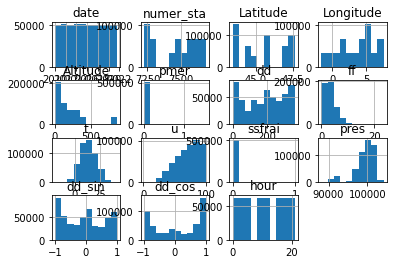

In [93]:
X.hist();

<Figure size 432x288 with 0 Axes>

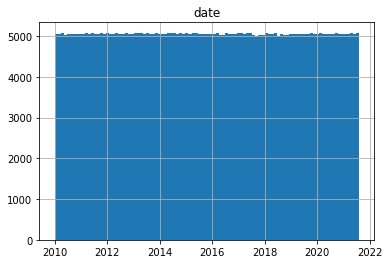

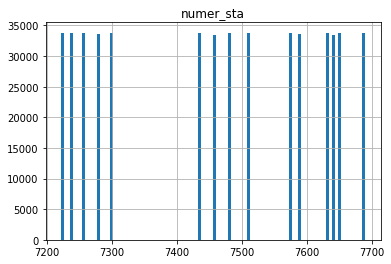

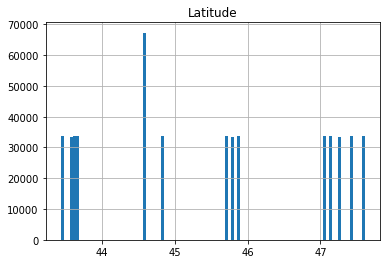

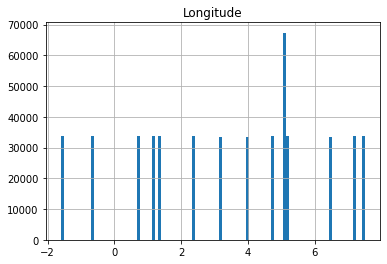

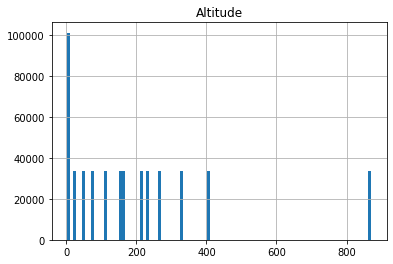

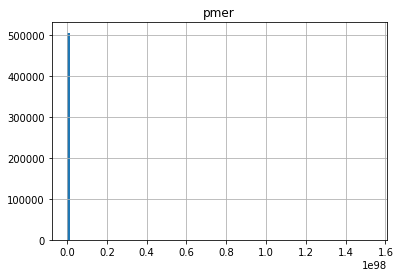

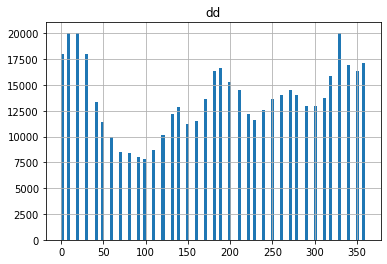

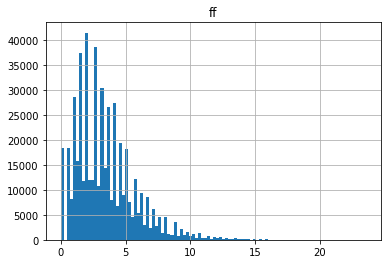

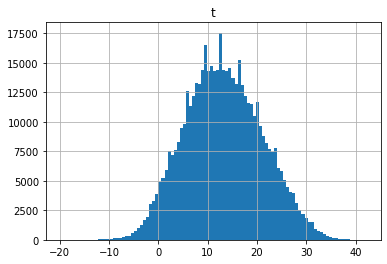

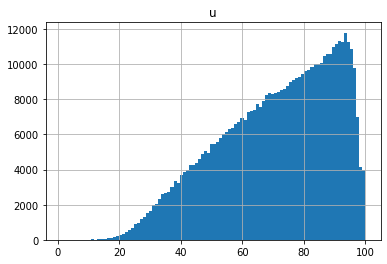

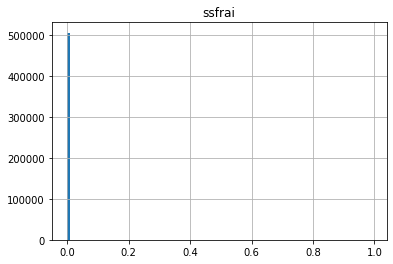

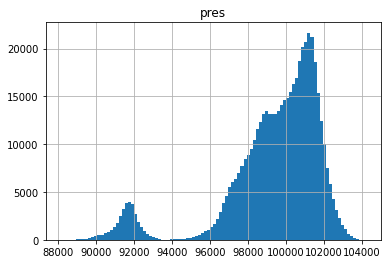

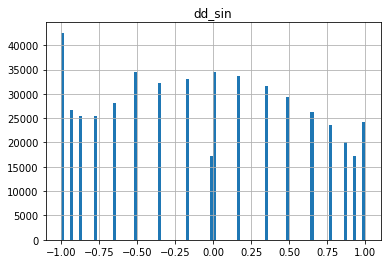

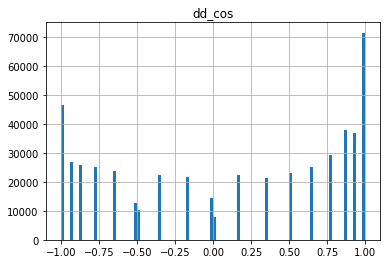

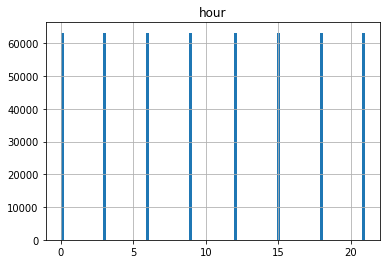

In [94]:

plt.figure()
for i,col in enumerate(X.columns):
    X.hist(column=col,bins=100)
    # Show/save figure as desired.
plt.show()
# Can show all four figures at once by calling plt.show() here, outside the loop.
#plt.show()

/Users/Marine/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

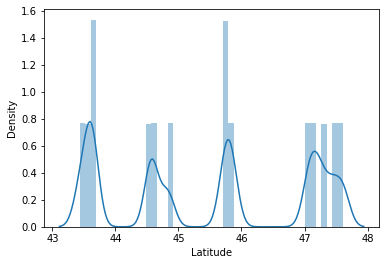

In [95]:
sns.distplot(a=X.Latitude)

### Normalize all columns

In [96]:
X_numerical = X.select_dtypes(include=['float64','int64'])
X_numerical

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,pres,dd_sin,dd_cos,hour
0,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,98410.0,-0.766044,-6.427876e-01,0
1,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,98520.0,-0.939693,-3.420201e-01,3
2,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,98920.0,-0.939693,3.420201e-01,6
3,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,99340.0,-0.766044,6.427876e-01,9
4,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,99690.0,-0.766044,6.427876e-01,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505656,7650.0,43.437667,5.216000,9.0,100920.0,310.0,3.2,27.2,58.0,0.0,100560.0,-0.766044,6.427876e-01,9
505657,7650.0,43.437667,5.216000,9.0,100770.0,270.0,6.1,30.6,49.0,0.0,100410.0,-1.000000,-1.836970e-16,12
505658,7650.0,43.437667,5.216000,9.0,100680.0,310.0,8.2,30.0,40.0,0.0,100320.0,-0.766044,6.427876e-01,15
505659,7650.0,43.437667,5.216000,9.0,100750.0,320.0,8.0,27.9,45.0,0.0,100390.0,-0.642788,7.660444e-01,18


In [98]:
X.columns

Index(['date', 'numer_sta', 'Latitude', 'Longitude', 'Altitude', 'pmer', 'dd',
       'ff', 't', 'u', 'ssfrai', 'pres', 'dd_sin', 'dd_cos', 'hour'],
      dtype='object')

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# MinMax all numerical columns
scaler = MinMaxScaler()

In [99]:

scaler.fit(X_numerical)
X_transformed = scaler.transform(X_numerical)
X_transformed=pd.DataFrame(X_transformed,columns=['numer_sta', 'Latitude', 'Longitude', 'Altitude', 'pmer', 'dd',
       'ff', 't', 'u', 'ssfrai', 'pres', 'dd_sin', 'dd_cos', 'hour'])
X_transformed

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,pres,dd_sin,dd_cos,hour
0,0.615385,0.33352,0.100616,0.051784,6.475587e-94,0.638889,0.417021,0.474878,0.808081,0.0,0.640225,0.116978,0.178606,0.000000
1,0.615385,0.33352,0.100616,0.051784,6.482778e-94,0.694444,0.502128,0.460292,0.868687,0.0,0.647096,0.030154,0.328990,0.142857
2,0.615385,0.33352,0.100616,0.051784,6.509583e-94,0.805556,0.217021,0.442464,0.909091,0.0,0.672080,0.030154,0.671010,0.285714
3,0.615385,0.33352,0.100616,0.051784,6.537041e-94,0.861111,0.242553,0.429498,0.919192,0.0,0.698314,0.116978,0.821394,0.428571
4,0.615385,0.33352,0.100616,0.051784,6.560577e-94,0.861111,0.263830,0.426256,0.818182,0.0,0.720175,0.116978,0.821394,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505656,0.914530,0.00000,0.748433,0.008055,6.597842e-94,0.861111,0.136170,0.760130,0.575758,0.0,0.774516,0.116978,0.821394,0.428571
505657,0.914530,0.00000,0.748433,0.008055,6.588035e-94,0.750000,0.259574,0.815235,0.484848,0.0,0.765147,0.000000,0.500000,0.571429
505658,0.914530,0.00000,0.748433,0.008055,6.582151e-94,0.861111,0.348936,0.805511,0.393939,0.0,0.759525,0.116978,0.821394,0.714286
505659,0.914530,0.00000,0.748433,0.008055,6.586728e-94,0.888889,0.340426,0.771475,0.444444,0.0,0.763898,0.178606,0.883022,0.857143


In [100]:
X_transformed['date']=X['date']
X_transformed

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,pres,dd_sin,dd_cos,hour,date
0,0.615385,0.33352,0.100616,0.051784,6.475587e-94,0.638889,0.417021,0.474878,0.808081,0.0,0.640225,0.116978,0.178606,0.000000,2010-01-01 00:00:00
1,0.615385,0.33352,0.100616,0.051784,6.482778e-94,0.694444,0.502128,0.460292,0.868687,0.0,0.647096,0.030154,0.328990,0.142857,2010-01-01 03:00:00
2,0.615385,0.33352,0.100616,0.051784,6.509583e-94,0.805556,0.217021,0.442464,0.909091,0.0,0.672080,0.030154,0.671010,0.285714,2010-01-01 06:00:00
3,0.615385,0.33352,0.100616,0.051784,6.537041e-94,0.861111,0.242553,0.429498,0.919192,0.0,0.698314,0.116978,0.821394,0.428571,2010-01-01 09:00:00
4,0.615385,0.33352,0.100616,0.051784,6.560577e-94,0.861111,0.263830,0.426256,0.818182,0.0,0.720175,0.116978,0.821394,0.571429,2010-01-01 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505656,0.914530,0.00000,0.748433,0.008055,6.597842e-94,0.861111,0.136170,0.760130,0.575758,0.0,0.774516,0.116978,0.821394,0.428571,2021-07-31 09:00:00
505657,0.914530,0.00000,0.748433,0.008055,6.588035e-94,0.750000,0.259574,0.815235,0.484848,0.0,0.765147,0.000000,0.500000,0.571429,2021-07-31 12:00:00
505658,0.914530,0.00000,0.748433,0.008055,6.582151e-94,0.861111,0.348936,0.805511,0.393939,0.0,0.759525,0.116978,0.821394,0.714286,2021-07-31 15:00:00
505659,0.914530,0.00000,0.748433,0.008055,6.586728e-94,0.888889,0.340426,0.771475,0.444444,0.0,0.763898,0.178606,0.883022,0.857143,2021-07-31 18:00:00


### Correlation - heatmap 

## Regression - Machine learning

__Modele 1__ :Log regression, check which features influence more the occurence of rain and train a predict model

## Deep learning - RNN

__Modele 2__ :Create RNN modèle 